In [1]:
import pandas as pd
import numpy as np
import os

# Create a dictionary to store the dataframes
data = {}

# Iterate through all the csv files in the dataset directory and store them in a dictionary with the key as the filename
dataset_directory = '../dataset'
for filename in os.listdir(dataset_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(dataset_directory, filename)
        # Remove .csv from the filename
        filename = filename[:-4]
        df = pd.read_csv(file_path)
      
        # Replace 0 in sum_gene_expression columns with NaN
        df['sum_gene_expr_normalized'] = np.log1p(df['sum_gene_expr'])
        df['mean_gene_expr_normalized'] = np.log1p(df['mean_gene_expr'])
        df['variance_gene_expr_normalized'] = np.log1p(df['variance_gene_expr'])

        # Store the DataFrame in the dictionary
        data[filename] = df


In [2]:
# display a dataframe from the dictionary
display(data['C3L-00359-01'].head())

,CaseID,gene_id,gene_name,chromosome,start,end,min_copy_number,max_copy_number,status,sum_gene_expr,mean_gene_expr,variance_gene_expr,copy_number_target,sum_gene_expr_normalized,mean_gene_expr_normalized,variance_gene_expr_normalized
0,C3L-00606-01,ENSG00000223972.5,DDX11L1,chr1,11869,14409,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,0.000000e+00
1,C3L-00606-01,ENSG00000227232.5,WASH7P,chr1,14404,29570,4.0,4.0,amplified,0.006084,4.167978e-07,1.770619e-10,4.0,0.006066,4.167977e-07,1.770619e-10
2,C3L-00606-01,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,0.000000e+00
3,C3L-00606-01,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,4.0,4.0,amplified,0.002205,1.510508e-07,3.707889e-11,4.0,0.002203,1.510508e-07,3.707889e-11
4,C3L-00606-01,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,0.000000e+00


In [3]:
combined_data = pd.concat(data.values(), axis=0)

#display the combined data
display(combined_data.head())

print(combined_data.shape)



,CaseID,gene_id,gene_name,chromosome,start,end,min_copy_number,max_copy_number,status,sum_gene_expr,mean_gene_expr,variance_gene_expr,copy_number_target,sum_gene_expr_normalized,mean_gene_expr_normalized,variance_gene_expr_normalized
0,C3L-00606-01,ENSG00000223972.5,DDX11L1,chr1,11869,14409,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,0.000000e+00
1,C3L-00606-01,ENSG00000227232.5,WASH7P,chr1,14404,29570,4.0,4.0,amplified,0.006084,4.167978e-07,1.770619e-10,4.0,0.006066,4.167977e-07,1.770619e-10
2,C3L-00606-01,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,0.000000e+00
3,C3L-00606-01,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,4.0,4.0,amplified,0.002205,1.510508e-07,3.707889e-11,4.0,0.002203,1.510508e-07,3.707889e-11
4,C3L-00606-01,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,0.000000e+00


(1994285, 16)


In [4]:
#print the number of unique start positions
print(combined_data['start'].nunique())

#print the number of unique end positions
print(combined_data['end'].nunique())

#print the number of unique chromosomes
print(combined_data['chromosome'].nunique())

#how many unique genes are there
print(combined_data['gene_id'].nunique())

#bin the start positions into 100 bins, then one hot encode the bins
combined_data['start_bin'] = pd.cut(combined_data['start'], bins=100, labels=False)
combined_data = pd.get_dummies(combined_data, columns=['start_bin'])

#bin the end positions into 100 bins, then one hot encode the bins
combined_data['end_bin'] = pd.cut(combined_data['end'], bins=100, labels=False)
combined_data = pd.get_dummies(combined_data, columns=['end_bin'])

#one hot encode the chromosomes
combined_data = pd.get_dummies(combined_data, columns=['chromosome'])

#drop the gene_id column
combined_data = combined_data.drop('gene_id', axis=1)

#drop the CaseID column
combined_data = combined_data.drop('CaseID', axis=1)

#drop the start and end columns
combined_data = combined_data.drop('start', axis=1)
combined_data = combined_data.drop('end', axis=1)


# combined_data = combined_data.drop('min_copy_number', axis=1)
# combined_data = combined_data.drop('max_copy_number', axis=1)
# combined_data = combined_data.drop('copy_number_target', axis=1)

58762
58730
24
58918


,gene_name,min_copy_number,max_copy_number,status,sum_gene_expr,mean_gene_expr,variance_gene_expr,copy_number_target,sum_gene_expr_normalized,mean_gene_expr_normalized,...,chromosome_chr22,chromosome_chr3,chromosome_chr4,chromosome_chr5,chromosome_chr6,chromosome_chr7,chromosome_chr8,chromosome_chr9,chromosome_chrX,chromosome_chrY
0,DDX11L1,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,...,False,False,False,False,False,False,False,False,False,False
1,WASH7P,4.0,4.0,amplified,0.006084,4.167978e-07,1.770619e-10,4.0,0.006066,4.167977e-07,...,False,False,False,False,False,False,False,False,False,False
2,MIR6859-1,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,...,False,False,False,False,False,False,False,False,False,False
3,MIR1302-2HG,4.0,4.0,amplified,0.002205,1.510508e-07,3.707889e-11,4.0,0.002203,1.510508e-07,...,False,False,False,False,False,False,False,False,False,False
4,MIR1302-2,4.0,4.0,amplified,0.000000,0.000000e+00,0.000000e+00,4.0,0.000000,0.000000e+00,...,False,False,False,False,False,False,False,False,False,False


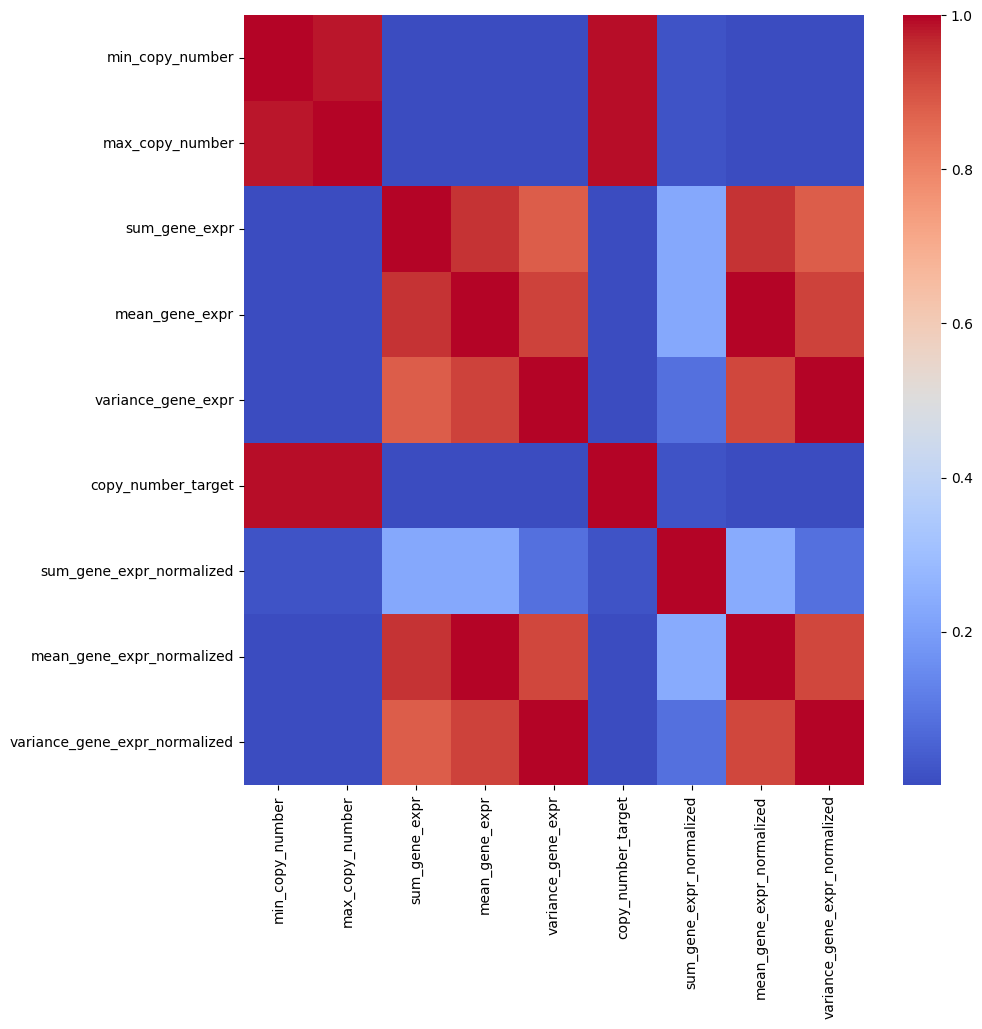

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows of combined_data to confirm structure
display(combined_data.head())

# Drop 'gene_name' and 'status' columns from combined_data
combined_data_corr = combined_data.drop(['gene_name', 'status'], axis=1)

#also drop the columns that have "bin" in the name
combined_data_corr = combined_data_corr.drop(combined_data_corr.filter(like='bin').columns, axis=1)

#also drop the columns that have "chromosome" in the name
combined_data_corr = combined_data_corr.drop(combined_data_corr.filter(like='chromosome').columns, axis=1)

# Calculate the correlation matrix
corr_matrix = combined_data_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()



This heatmap presents the correlation matrix for various genomic features related to gene expression and copy number. The red diagonal line shows perfect self-correlation for each feature. We can see high positive correlations between `sum_gene_expr` and `mean_gene_expr`, as well as between `sum_gene_expr_normalized` and `mean_gene_expr_normalized`, suggesting that the aggregate and average gene expression values are highly interdependent.

c:\Users\amani\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

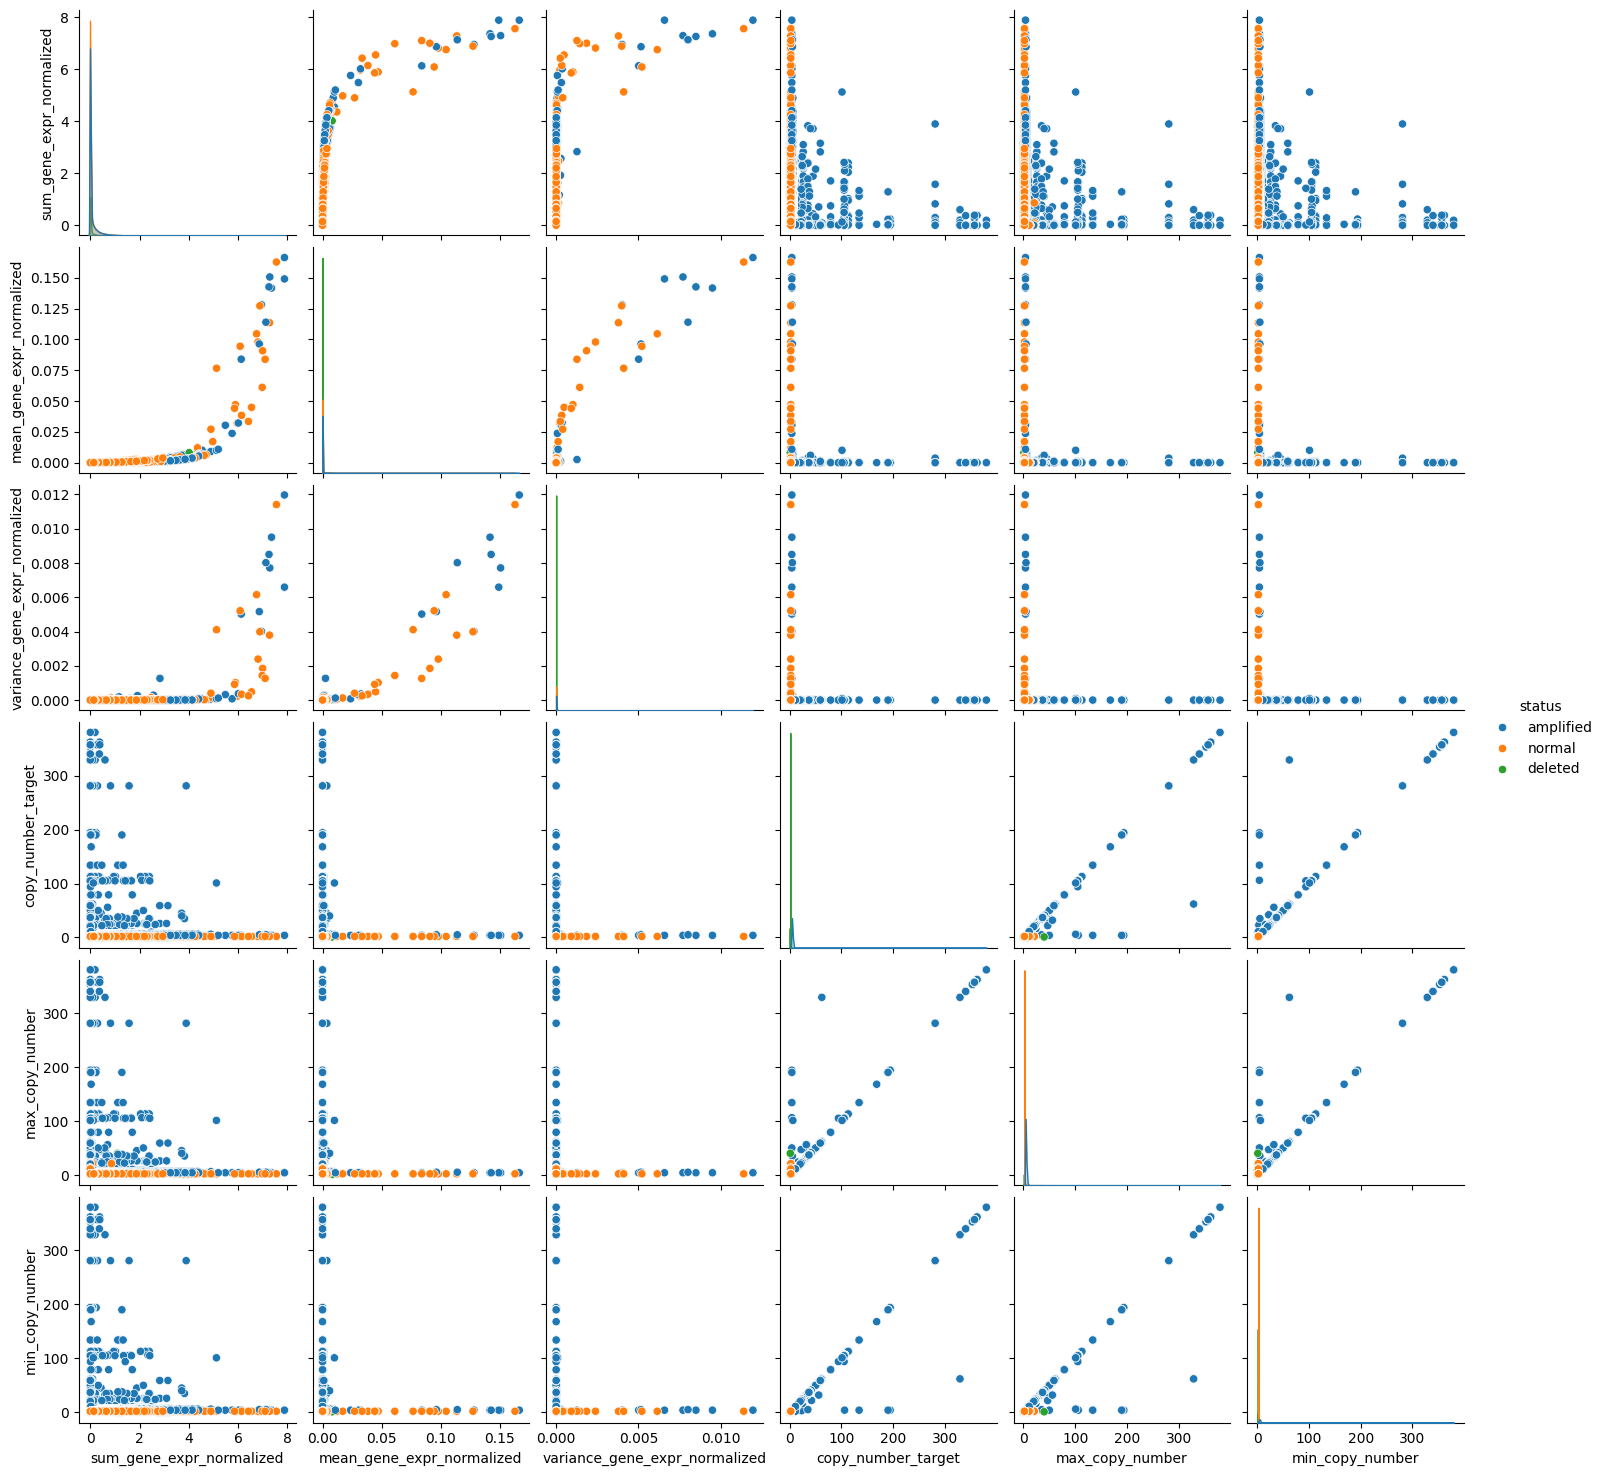

In [7]:
# Plot the pairplot
plt.figure(figsize=(10,10))

# Use the 'status' column to color the points
sns.pairplot(combined_data[['sum_gene_expr_normalized', 'mean_gene_expr_normalized', 'variance_gene_expr_normalized', 'copy_number_target', 'max_copy_number', 'min_copy_number','status']], hue='status')
plt.show()
